In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import os
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, RocCurveDisplay
from sklearn.model_selection import GridSearchCV


In [53]:
data = pd.read_csv("./data/combinada_binaria.csv", encoding="latin1")

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203300 entries, 0 to 203299
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Fecha           203300 non-null  object 
 1   Numero_vuelo    203300 non-null  object 
 2   Station         203300 non-null  object 
 3   AC              203300 non-null  object 
 4   Minutos         203300 non-null  float64
 5   ATA             203300 non-null  int64  
 6   Total_Vuelos    203300 non-null  int64  
 7   Hora            203300 non-null  int64  
 8   Franja_Horaria  203300 non-null  object 
 9   Mes             203300 non-null  int64  
 10  AÃ±o            203300 non-null  int64  
 11  Estacion_Ano    203300 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 18.6+ MB


In [55]:
# Selección de las variables y tarjet
X = data[['Minutos', 'Total_Vuelos', 'Hora', 'Franja_Horaria', 'AC', 'Estacion_Ano']]
y = data['ATA']

In [56]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [57]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(162640, 6)
(162640,)
(40660, 6)
(40660,)


In [58]:
# Análisis de tipos de variables
categorical_columns = X.select_dtypes(include=['object']).columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
print(f'Categóricas: {list(categorical_columns)}')
print(f'Numéricas: {list(numeric_columns)}')

Categóricas: ['Franja_Horaria', 'AC', 'Estacion_Ano']
Numéricas: ['Minutos', 'Total_Vuelos', 'Hora']


In [ ]:
# Codificar variables según tipo
categorical_features = ['Franja_Horaria', 'AC', 'Estacion_Ano']
numeric_features = ['Minutos', 'Total_Vuelos', 'Hora']

### Usaremos varios modelos para compararlos e identificar cual es el que mejor se adapta

In [60]:
# Preprocesamiento para Logistic Regression (escalado numérico)
# La regresión logítisca es sensible a las escalas de las variable, por lo que el escalado mejora su rendimiento. Media 0 y desviación estandar 1.
# En este caso nos interesa porque trabajando con diferentes escalas, se tiene en en cuenta todas las variables de forma más equilibrada.
numeric_transformer_lr = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')# convertimos cada caracteristica o valor de una categorica a una columna de binaria. Así pasamos de texto a número.

In [61]:
# Preprocesao para regression logistica
preprocessor_lr = ColumnTransformer(transformers=[('num', numeric_transformer_lr, numeric_features),('cat', categorical_transformer, categorical_features)],remainder='passthrough')

In [62]:
# Preprocesamiento para modelos de árboles (sin escalado)
preprocessor_trees = ColumnTransformer(transformers=[('cat', categorical_transformer, categorical_features)],remainder='passthrough')

In [63]:
# Prueba de los distintos modelos
models = {
    "Logistic Regression": (LogisticRegression(max_iter=1000, random_state=42), preprocessor_lr), # Logistic Regression: Sencillo, rápido y fácil de interpretar.
    "Random Forest": (RandomForestClassifier(n_estimators=100, random_state=42), preprocessor_trees), # Random Forest: Robusto, no requiere escalado, ideal para capturar no linealidades.
    "Gradient Boosting": (GradientBoostingClassifier(random_state=42), preprocessor_trees) # Gradient Boosting: Excelente para datos tabulares con relaciones complejas.
}

#### Se usa pipeline
Para garantizar que el preprocesamiento de los datos solo sea en el entrenamiento y se evita que expongan en la parte de test.


Procesando modelo: Logistic Regression
Realizando validación cruzada...


Resultados de Validación Cruzada (ROC-AUC) para Logistic Regression: 0.9840
Entrenando el modelo y generando predicciones...
Generando matriz de confusión...


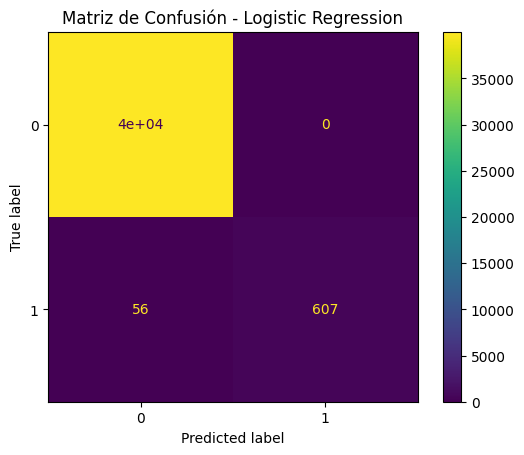

Reporte de clasificación para Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39997
           1       1.00      0.92      0.96       663

    accuracy                           1.00     40660
   macro avg       1.00      0.96      0.98     40660
weighted avg       1.00      1.00      1.00     40660


Procesando modelo: Random Forest
Realizando validación cruzada...
Resultados de Validación Cruzada (ROC-AUC) para Random Forest: 0.9830
Entrenando el modelo y generando predicciones...
Generando matriz de confusión...


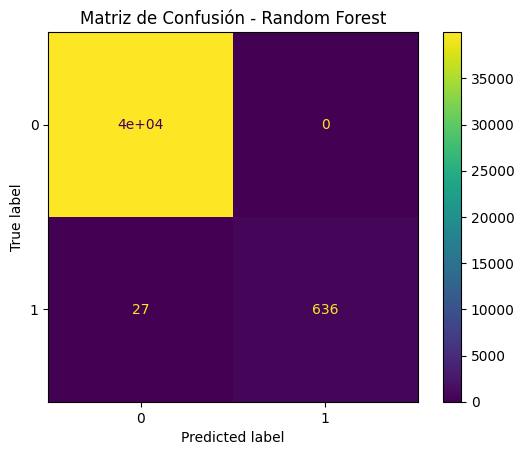

Reporte de clasificación para Random Forest:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39997
           1       1.00      0.96      0.98       663

    accuracy                           1.00     40660
   macro avg       1.00      0.98      0.99     40660
weighted avg       1.00      1.00      1.00     40660


Procesando modelo: Gradient Boosting
Realizando validación cruzada...
Resultados de Validación Cruzada (ROC-AUC) para Gradient Boosting: 0.9826
Entrenando el modelo y generando predicciones...
Generando matriz de confusión...


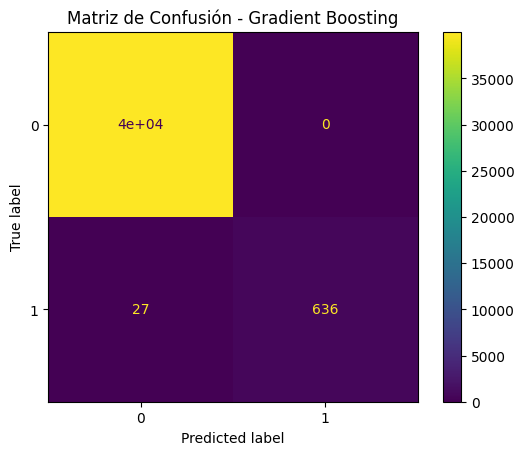

Reporte de clasificación para Gradient Boosting:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39997
           1       1.00      0.96      0.98       663

    accuracy                           1.00     40660
   macro avg       1.00      0.98      0.99     40660
weighted avg       1.00      1.00      1.00     40660



'\nGenera un informe detallado con métricas clave para cada clase (0 y 1):\nPrecisión (Precision): Proporción de predicciones correctas de la clase positiva.\nCobertura (Recall): Proporción de verdaderos positivos detectados.\nF1-Score: Promedio armonizado entre precisión y cobertura.\nSoporte (Support): Cantidad de ejemplos reales en cada clase.\nPropósito: Evaluar el rendimiento del modelo en detalle, identificando fortalezas y debilidades.\n'

In [ ]:
# Probar modelos uno por uno
for model_name, (model, preprocessor) in models.items():
    print(f"\nProcesando modelo: {model_name}")
    # Crear pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor), #Transforma las variables categóricas y numéricas según el modelo.
        ('classifier', model) # El modelo ML se ajustará y evaluará.
    ])
    # Validación cruzada
    print("Realizando validación cruzada...")
    cv_score = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc') # hacemos 5 subdivisiones, métrica para la curva ROC
    print(f"Resultados de Validación Cruzada (ROC-AUC) para {model_name}: {cv_score.mean():.4f}") # SAcamos el rendimiento promedio.
    
    # Entrenar y evaluar el modelo
    print("Entrenando el modelo y generando predicciones...")
    pipeline.fit(X_train, y_train) # Ajusta el modelo con el conjunto de entrenamiento (X_train, y_train)
    y_pred = pipeline.predict(X_test) # Genera predicciones para el conjunto de prueba (X_test).
    
    # Matriz de confusión
    print("Generando matriz de confusión...")
    cm = confusion_matrix(y_test, y_pred) #Genera una matriz que compara las etiquetas reales (y_test) con las predicciones (y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Visualizamos la matriz de confusión en un gráfico. Podremos ver los aciertos y errores.
    disp.plot(cmap="viridis")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.show()
    
    # Métricas detalladas
    print(f"Reporte de clasificación para {model_name}:\n")
    print(classification_report(y_test, y_pred))
'''
Genera un informe detallado con métricas clave para cada clase (0 y 1):
Precisión (Precision): Proporción de predicciones correctas de la clase positiva.
Cobertura (Recall): Proporción de verdaderos positivos detectados.
F1-Score: Promedio entre precisión y cobertura.
Soporte (Support): Número de ejemplos reales en cada clase.
Propósito: Evaluar el rendimiento de cada modelo, identificando fortalezas y debilidades. 
'''

Utilizamos el pipeline para evalugar varios modelos.
El bucle itera sobre un diccionario llamado models, donde:  
Creamos un pipeline.
Aplicamos validacion cruzada para medir el rendimiento de cada uno.  
Entrenamos con los datos de entrenamiento y evaluamos sus predicciones en el conjunto de test.  
Generamos una matriz de confusión y un reporte de clasificación para analizar el rendimiento.  

### Selección del Modelo
El modelo seleccionado fue **Random Forest** por su rendimiento superior:
- **ROC-AUC:** 0.9828
- **Precisión general:** 98.3%
- Aplica mútliples árboles de decisión en subconjutnos y combina resutlado para evitar sobreajuste.   
- En comparación el gradient es más preciso pero requiere mas tiempo al ser más precio, lento y sensible a los hiperparametros
 

In [65]:
# Entrenar el modelo seleccionado: Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_trees),('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])
# Con preprocessor usamos el preprocessor_trees para las variables categóricas con OneHotEncoder

In [66]:
# Entrenamiento y predricciones
rf_pipeline.fit(X_train, y_train)
y_pred = rf_pipeline.predict(X_test)
y_pred_proba = rf_pipeline.predict_proba(X_test)[:, 1]

In [ ]:
# 1. Análisis de importancia de variables
rf_model = rf_pipeline.named_steps['classifier'] #Accede al clasificador entrenado (RandomForestClassifier) dentro del pipeline
feature_names = preprocessor_trees.transformers_[0][1].get_feature_names_out(categorical_features).tolist() #Obtiene los nombres de las variables categóricas procesadas con OneHotEncoder
feature_names += numeric_features
importances = rf_model.feature_importances_ # asigna un valor de importancia a cada variable según su contribución a las decisiones del modelo 
sorted_indices = np.argsort(importances)[::-1] # Ordena índice de mayor a menor por importancia

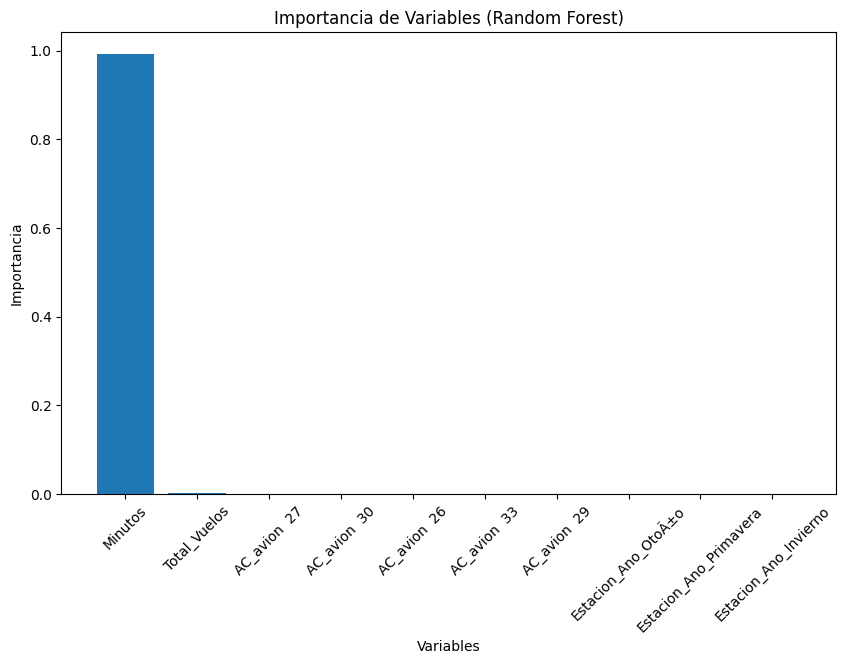

In [ ]:
# Visualización de importancia de variables
# Genera un gráfico de barras mostrando las 10 variables más importantes.
plt.figure(figsize=(10, 6))
plt.bar([feature_names[i] for i in sorted_indices[:10]], importances[sorted_indices[:10]])
plt.title("Importancia de Variables (Random Forest)")
plt.ylabel("Importancia")
plt.xlabel("Variables")
plt.xticks(rotation=45)
plt.show()

Este gráfico muestra las variables más importantes para el modelo Random Forest, indicando cuáles tienen mayor impacto en las predicciones.   
Las barras más largas representan variables con mayor contribución, como los retrasos en minutos o el tipo de avión.   
Es útil para comprender los factores clave que impulsan las decisiones del modelo y justificarlo ante audiencias no técnicas.  

In [69]:
# 2. Visualización de precision, recall y F1-score
report = classification_report(y_test, y_pred, output_dict=True)
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[['0', '1'], ['precision', 'recall', 'f1-score']]

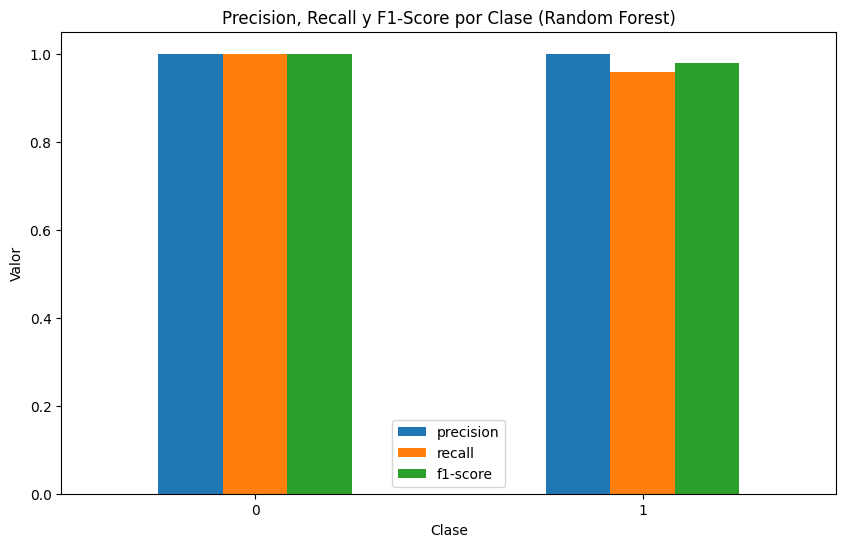

In [70]:
# Gráfico de métricas por clase
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall y F1-Score por Clase (Random Forest)")
plt.ylabel("Valor")
plt.xlabel("Clase")
plt.xticks(rotation=0)
plt.show()

Este gráfico compara precisión, recall y F1-score para las clases "Sin avería" (0) y "Con avería" (1).   
La precisión mide cuántas predicciones de averías fueron correctas, mientras que el recall mide cuántas averías reales fueron detectadas.   
El F1-score combina ambas métricas para evaluar el balance en clases desbalanceadas.   
Los resultados muestran un resultado muy bueno en la clase 0 y un bueno para la clase 1, aunque con un recall ligeramente más bajo. Quizás algunas averías podrían pasar desapercibidas (falsos negativos).   
Este análisis destaca el equilibrio del modelo en identificar correctamente ambas clases.

In [71]:
# 3. Detección de errores sistemáticos: análisis de falsos positivos y negativos
errors = pd.DataFrame({
    'Predicted': y_pred,
    'Actual': y_test,
    'Minutos': X_test['Minutos'],
    'Total_Vuelos': X_test['Total_Vuelos'],
    'AC': X_test['AC']
})

In [72]:
# Filtrar FP y FN
falsos_positivos = errors[(errors['Predicted'] == 1) & (errors['Actual'] == 0)]
falsos_negativos = errors[(errors['Predicted'] == 0) & (errors['Actual'] == 1)]

In [73]:
# Mostrar falsos positivos
print("Falsos Positivos (Random Forest):")
print(falsos_positivos.head(10))

# Mostrar falsos negativos
print("Falsos Negativos (Random Forest):")
print(falsos_negativos.head(20))

Falsos Positivos (Random Forest):
Empty DataFrame
Columns: [Predicted, Actual, Minutos, Total_Vuelos, AC]
Index: []
Falsos Negativos (Random Forest):
        Predicted  Actual  Minutos  Total_Vuelos         AC
202776          0       1      0.0          8285  avion  22
201943          0       1      0.0          6958  avion  23
202873          0       1      0.0          4202  avion  37
201521          0       1      0.0          6958  avion  23
202014          0       1      0.0          7784   avion  3
200865          0       1      0.0          8535  avion  21
200998          0       1      0.0          6463   avion  4
202925          0       1      0.0          4759  avion  36
200590          0       1      0.0          7981   avion  1
201905          0       1      0.0          6868  avion  16
202039          0       1      0.0          3254  avion  24
201917          0       1      0.0          8185  avion  20
201030          0       1      0.0          8211  avion  25
201727    

In [74]:
# Verificar los tamaños de los errores
print(f"Falsos positivos: {len(falsos_positivos)}")
print(f"Falsos negativos: {len(falsos_negativos)}")

Falsos positivos: 0
Falsos negativos: 27


#### Train, validation y test

In [75]:
# Dividir los datos en train (70%), validation (15%) y test (15%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.1765, random_state=42, stratify=y_train_full) #stratify asegura que la proporción de clases en los conjuntos sea similar a la original.


In [76]:
# Comprobación
print(f"Tamaños: Train = {len(X_train)}, Validation = {len(X_val)}, Test = {len(X_test)}")


Tamaños: Train = 142304, Validation = 30501, Test = 30495


In [77]:
# Otra forma de comprobación
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(142304, 6)
(30501, 6)
(30495, 6)


In [78]:
# Preproceso para Random Forest mediante el OneHotEncoding
preprocessor_trees = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['Franja_Horaria', 'AC', 'Estacion_Ano'])],remainder='passthrough') #remainder='passthrough.'Las columnas no especificadas (numéricas) se dejan sin procesar.

In [79]:
# Crear pipeline, aseguramos que no haya errores juntos
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_trees),('classifier', RandomForestClassifier(random_state=42))])

In [80]:
# Definir los hiperparámetros para GridSearch
param_grid = {
    'classifier__n_estimators': [50, 100], # Número de árboles en el bosque (50 o 100)
    'classifier__max_depth': [10, 20, None], # Profundidad máxima de los árboles (10, 20 o ilimitada)
    'classifier__min_samples_leaf': [1, 2] # Número mínimo de muestras requeridas en una hoja (1 o 2
}

In [81]:
# Configurar GridSearchCV
# Busca los mejores hiperparámetros basados en el conjunto de entrenamiento y validación cruzada.
grid_search = GridSearchCV(
    estimator=rf_pipeline, # Pipeline con preprocesador y modelo
    param_grid=param_grid, # Hiperparámetros a probar
    cv=5, # 5 pliegues
    scoring='roc_auc', # evaluación con roc
    verbose=1,
    n_jobs=-1
)

# Ajustar el modelo en el conjunto de entrenamiento
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Franja_Horaria',
                                                                          'AC',
                                                                          'Estacion_Ano'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [10, 20, None],
                         'classifier__min_samples_leaf': [1, 2],
                         'classifier__n_estimators': [50, 100]},
             scoring='roc_auc', verbose=1)

In [82]:
# Mejor modelo y parámetros
best_model = grid_search.best_estimator_ # Modelo optimizado con los mejores hiperparámetros
best_params = grid_search.best_params_ # Los valores óptimos de los hiperparámetros
best_score = grid_search.best_score_ # El mejor puntaje ROC-AUC obtenido en validación cruzada

In [83]:
# Evaluar el modelo optimizado en el conjunto de validación y prueba
y_val_pred_proba = best_model.predict_proba(X_val)[:, 1]
val_roc_auc = roc_auc_score(y_val, y_val_pred_proba)

y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_test_pred_proba)

In [84]:
print(f"Mejores hiperparámetros: {best_params}")
print(f"ROC-AUC (Validación): {val_roc_auc:.4f}")
print(f"ROC-AUC (Test): {test_roc_auc:.4f}")

Mejores hiperparámetros: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 50}
ROC-AUC (Validación): 0.9806
ROC-AUC (Test): 0.9828


In [85]:
# Realizar la predicción con el modelo optimizado
y_test_pred = best_model.predict(X_test)
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]  # Probabilidades si son necesarias

# Verificar que las variables del conjunto de prueba existen
X_test = X_test.copy()  # Aseguramos que X_test tiene todas las columnas necesarias
X_test['Minutos'] = X['Minutos']
X_test['Total_Vuelos'] = X['Total_Vuelos']
X_test['AC'] = X['AC']
X_test['Estacion_Ano'] = X['Estacion_Ano']

# Crear el dataframe para errores
errors = pd.DataFrame({
    'Predicted': y_test_pred,
    'Actual': y_test,
    'Minutos': X_test['Minutos'],
    'Total_Vuelos': X_test['Total_Vuelos'],
    'AC': X_test['AC'],
    'Estacion_Ano': X_test['Estacion_Ano']
})

# Filtrar falsos positivos y falsos negativos
falsos_positivos = errors[(errors['Predicted'] == 1) & (errors['Actual'] == 0)]
falsos_negativos = errors[(errors['Predicted'] == 0) & (errors['Actual'] == 1)]

# Verificar los tamaños de los errores
print(f"Falsos positivos: {len(falsos_positivos)}")
print(f"Falsos negativos: {len(falsos_negativos)}")


Falsos positivos: 0
Falsos negativos: 16


<Figure size 1000x600 with 0 Axes>

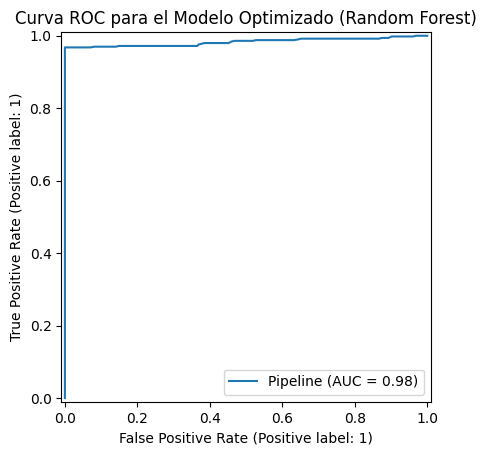

In [86]:
# Visaliación del balance entre faltos positivos y verdadres positivos
from sklearn.metrics import RocCurveDisplay

# 1. Visualizar la curva ROC para el modelo optimizado
plt.figure(figsize=(10, 6))
roc_display = RocCurveDisplay.from_estimator(best_model, X_test, y_test)
plt.title("Curva ROC para el Modelo Optimizado (Random Forest)")
plt.show()

In [87]:
# 2. Consolidar resultados del modelo optimizado
metrics_report = classification_report(y_test, y_test_pred, output_dict=True)
metrics_df = pd.DataFrame(metrics_report).transpose()

In [88]:
# Reporte de métricas clave
final_report = {
    "Mejores Hiperparámetros": best_params,
    "ROC-AUC (Validación)": best_score,
    "ROC-AUC (Prueba)": roc_auc_score(y_test, y_test_pred_proba),
    "Reporte de Clasificación": metrics_df
}

In [91]:
# Reporte de métricas 
print("Reporte Consolidado de Métricas (Random Forest):")
print(metrics_df)

# Resumen de los hiperparámetros y métricas clave
print("\nResumen de Hiperparámetros y Métricas Clave:")
print(f"Mejores Hiperparámetros: {best_params}")
print(f"ROC-AUC Validación: {best_score:.4f}")
print(f"ROC-AUC Prueba: {roc_auc_score(y_test, y_test_pred_proba):.4f}")


Reporte Consolidado de Métricas (Random Forest):
              precision    recall  f1-score       support
0              0.999467  1.000000  0.999733  29998.000000
1              1.000000  0.967807  0.983640    497.000000
accuracy       0.999475  0.999475  0.999475      0.999475
macro avg      0.999733  0.983903  0.991687  30495.000000
weighted avg   0.999476  0.999475  0.999471  30495.000000

Resumen de Hiperparámetros y Métricas Clave:
Mejores Hiperparámetros: {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__n_estimators': 50}
ROC-AUC Validación: 0.9827
ROC-AUC Prueba: 0.9828


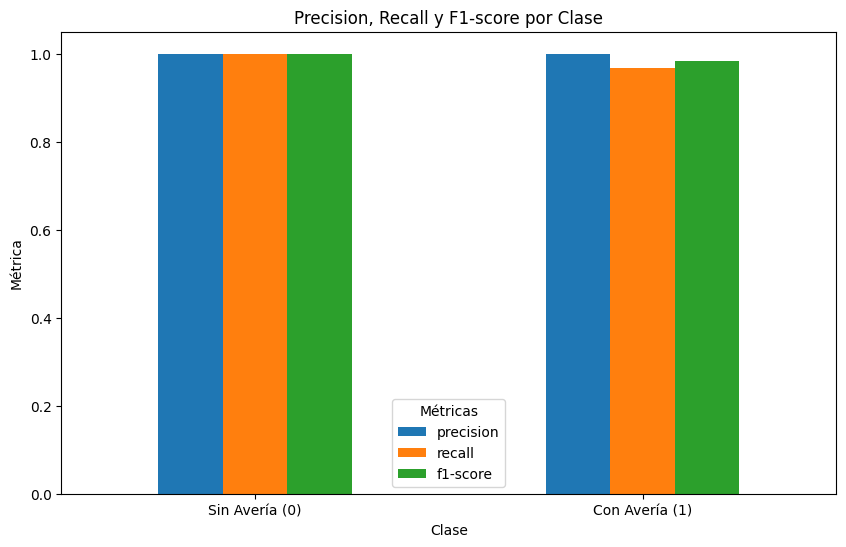

In [ ]:
# Gráfico de Precision, Recall y F1-score por clase
metrics_df[['precision', 'recall', 'f1-score']].iloc[:2].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall y F1-score por Clase")
plt.ylabel("Métrica")
plt.xlabel("Clase")
plt.xticks(ticks=[0, 1], labels=['Sin Avería (0)', 'Con Avería (1)'], rotation=0)
plt.legend(title="Métricas")
plt.show()

In [94]:
import joblib

In [95]:
# Guardar el modelo en la misma carpeta del script
model_path = "best_rf_model.pkl"
joblib.dump(best_model, model_path)
print(f"Modelo guardado como '{model_path}' en la carpeta actual.")

Modelo guardado como 'best_rf_model.pkl' en la carpeta actual.


In [96]:
# Guardar el conjunto de prueba en archivos CSV
X_test.to_csv(os.path.join("./data/X_test.csv"), index=False)
y_test.to_csv(os.path.join("./data/y_test.csv"), index=False)

print("Datos de prueba guardados en la carpeta 'data':")
print("- X_test.csv")
print("- y_test.csv")

Datos de prueba guardados en la carpeta 'data':
- X_test.csv
- y_test.csv


#### Resmen de las acciones

En esta parte hemos aplicado GirdsearchCV para buscar los mejores hiperparametros con la validación cruzada.
La métrica nos dice la capacidad del Random Forest para distinguir entre las clases
Conseguimos maximizar el rendimiento.
 

### **Análisis de los Resultados**

1. **Resultados generales:**
   - Todos los modelos presentan un excelente rendimiento con métricas muy altas, reflejadas en valores de ROC-AUC cercanos a 0.98 y precisión global casi perfecta.
   - Las principales diferencias entre los modelos son mínimas, por lo que se debe evaluar el contexto y la facilidad de interpretación para seleccionar el modelo óptimo.

---

2. **Resultados individuales:**

   - **Logistic Regression:**
     - **ROC-AUC (Validación cruzada):** 0.9840 (el más alto).
     - **Matriz de confusión:** Identifica correctamente la mayoría de las averías, aunque tiene algunos falsos negativos (FN). 
     - **Precision y Recall:**
       - Clase 1 (averías): `Recall = 0.92` significa que el modelo no detecta el 8% de las averías.
       - Este modelo es más fácil de interpretar, ideal para entender qué variables están impulsando las predicciones.

   - **Random Forest:**
     - **ROC-AUC (Validación cruzada):** 0.9830.
     - **Matriz de confusión:** Mejor recall para la clase 1 (`Recall = 0.96`), reduciendo los falsos negativos en comparación con Logistic Regression.
     - Este modelo es robusto y puede capturar relaciones complejas, aunque es menos interpretable.

   - **Gradient Boosting:**
     - **ROC-AUC (Validación cruzada):** 0.9826 (el más bajo de los tres, pero aún excelente).
     - **Matriz de confusión y Recall:** Similar a Random Forest (`Recall = 0.96`).
     - Es un modelo potente para conjuntos de datos tabulares, pero requiere más tiempo de entrenamiento.

---

3. **Matriz de confusión para los tres modelos:**
   - Clase 0 (sin averías):
     - Todos los modelos tienen un rendimiento casi perfecto, clasificando correctamente la mayoría de los casos.
   - Clase 1 (averías):
     - **Logistic Regression:** Recall más bajo (92%), lo que significa que falla en detectar más averías.
     - **Random Forest y Gradient Boosting:** Recall más alto (96%), detectando más averías, pero con mayor complejidad.
